In [2]:
import numpy as np
from numpy import array, pi,sin
from scipy.linalg import norm

m=100
n=100
k=array([range(1,m+1)])
l=array([range(1,n+1)])
A = sin(pi*k.T@l/(m*n))

norm2mat = norm(A, 2)

ATA = A.T @ A
eigenvalues = np.linalg.eigvals(ATA)
norm2eig = np.sqrt(np.max(np.real(eigenvalues)))

norm2chk = abs(norm2mat - norm2eig)

cond2mat = np.linalg.cond(A, 2)

def round_up(x, decimals=4):
    factor = 10 ** decimals
    return np.ceil(x * factor) / factor

norm2mat = round_up(norm2mat)
norm2eig = round_up(norm2eig)
norm2chk = round_up(norm2chk)
cond2mat = round_up(cond2mat)

# Output results
print(f"norm2mat = {norm2mat}")
print(f"norm2eig = {norm2eig}")
print(f"norm2chk = {norm2chk}")
print(f"cond2mat = {cond2mat}")

norm2mat = 61.5612
norm2eig = 61.5612
norm2chk = 0.0001
cond2mat = 3.0476196424331697e+20


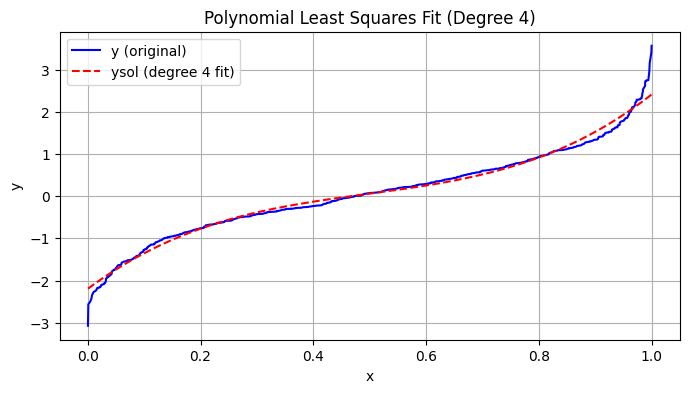

z = [ -2.1987   9.9758 -16.3136  10.6553   0.3   ]
err = 3.4006
sx = 488.8326, sy = 32.0805, sysol = 32.0805


In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('lsdata.dat', unpack=True)

x = data[0]
y = data[1]


X = np.vstack([x**i for i in range(5)]).T
z, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

ysol = X @ z

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', label='y (original)')
plt.plot(x, ysol, 'r--', label='ysol (degree 4 fit)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Least Squares Fit (Degree 4)')
plt.grid(True)
plt.show()

err = np.linalg.norm(y - ysol, 2)

sx = np.sum(x)
sy = np.sum(y)
sysol = np.sum(ysol)

def round_up(val, decimals=4):
    return np.ceil(val * 10**decimals) / 10**decimals

err = round_up(err)
sx = round_up(sx)
sy = round_up(sy)
sysol = round_up(sysol)

print(f"z = {np.round(z, 4)}")
print(f"err = {err}")
print(f"sx = {sx}, sy = {sy}, sysol = {sysol}")

In [ ]:
import numpy as np
from numpy.random import randn, seed

n = 10**6
seed(1)
u = randn(n, 1)
v = randn(n, 1)
b = randn(n, 1)

def solve_inv_y(y):
    x = np.empty_like(y)
    x[0] = y[0]
    x[1:] = y[1:] - y[:-1]
    return x


D_inv__b = solve_inv_y(b)
binv5 = D_inv__b[:5].flatten()

D_inv__u = solve_inv_y(u)
denom = float(1 + v.T @ D_inv__u)

num = float(v.T @ D_inv__b)

x = D_inv__b - (D_inv__u * (num / denom))
normx0 = np.linalg.norm(x, 2)


def round_up(x, d=4):
    return np.ceil(x * 10**d) / 10**d

binv5 = np.round(binv5, 4)
denom = round_up(denom)
num = round_up(num)
normx0 = round_up(normx0)

# Results
print("binv5 =", binv5)
print("denom =", denom)
print("num =", num)
print("normx0 =", normx0)


binv5 = [ 1.9265 -2.2925  0.0483  1.1937 -0.3824]
denom = -408.3463
num = -332.3961
normx0 = 1823.8534


/tmp/ipykernel_272183/2409006392.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  denom = float(1 + v.T @ Dinv_u)
/tmp/ipykernel_272183/2409006392.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = float(v.T @ Dinv_b)
